# SRE Test Codes

Julie Butler Hartley

Date Created: April 15, 2021

Last Modified: APril 16, 2021

## Imports

At the current version need to import all four files of SRE separately.

In [1]:
# Third-Party Imports
import numpy as np
import matplotlib.pyplot as plt

# Local Imports (look at the files for documentation)
from Regression import *
from Analysis import *
from Support import *
from Extrapolate import *

## Approximating Sine

The following code uses SRE to approximate a sine function using SRE.  The results from SRE can be changed by changing the alpha value and/or the length of the sequence (seq).  The range can be made pretty small and this method can still approximate sine very well.

Starting Linear Regression
Solving Using Closed Form Ridge Regression
Iterative Solving Methods May be Implemented in later versions
Performing Modified Ridge Regression
Data Normalization and Fitting an Intercept Will Be Used
The MSE score between the predicted and true data             is 7.972240436632377e-25
The R2 score between the predicted and true data                 is 1.0


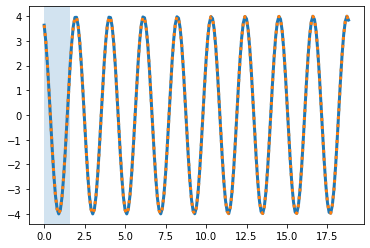

In [2]:
# Create the total data set and plot it
Xtot = np.arange(0, 6*np.pi, 0.1)
ytot = 4*np.sin(3*Xtot+2)
plt.plot(Xtot, ytot, linewidth=3, label="True Data")

# Set the min and max values for the training data and plot the region
min = 0
max = 0.5*np.pi
plt.axvspan(min, max, alpha=0.2)

# Create the training data
Xtrain = np.arange(min, max, 0.1)
ytrain = 4*np.sin(3*Xtrain+2)
# Note: training data needs to be a LIST
ytrain = ytrain.tolist()

# Format only the y component of the training data using sequential
# data formatting
X, y = format_sequential_data (ytrain, seq=2)

# Initialize and instance of the ridge regression classs and train
# it using the formatted data
R = RR(0, True)
R.fit(X, y)

# Using the trained ridge regression algorithm, extrapolate the
# training data set until the total set is the same length as the
# total data set
y_test = sequential_extrapolate(R, ytrain, len(ytot), seq=2,\
    isAutoRegressive = False, isErrorAnalysis = True, y_true = ytot)

# Plot the predicted data and save the image
plt.plot(Xtot, y_test, ':', label="Predicted Data", linewidth=3)
plt.savefig("sine.png",dpi=1000)


## Aproximating A Polynomial

The below code shows how well a ridge regression algorithm can approximate a polynomial using SRE.  Ridge regression does not work too well for degrees above 2, so to test other degrees I would recommend using Kernel Ridge Regression (KRR) instead of regular Ridge Regression.

0 2
Starting Linear Regression
Solving Using Closed Form Ridge Regression
Iterative Solving Methods May be Implemented in later versions
Performing Modified Ridge Regression
Data Normalization and Fitting an Intercept Will Be Used
The MSE score between the predicted and true data             is 2.296367027495575e-13
The R2 score between the predicted and true data                 is 0.9999999999999999


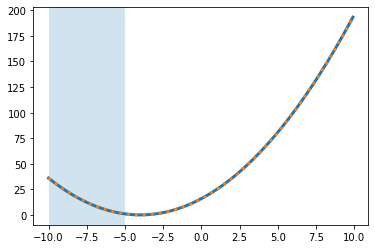

In [22]:
# Create the total data set and plot it
degree = 2
coef = 4
Xtot = np.arange(-10, 10, 0.1)
ytot = (Xtot+coef)**degree
plt.plot(Xtot, ytot, linewidth=3, label="True Data")

# Set the min and max values for the training data and plot the region
min = -10
max = -5
plt.axvspan(min, max, alpha=0.2)

# Create the training data
Xtrain = np.arange(min, max, 0.1)
ytrain = (Xtrain+coef)**degree
# Note: training data needs to be a LIST
ytrain = ytrain.tolist()

# Regression Parameters
seq = 2
alpha = 0

# Format only the y component of the training data using sequential
# data formatting
X, y = format_sequential_data (ytrain, seq=seq)

print(alpha, seq)
# Initialize and instance of the ridge regression classs and train
# it using the formatted data
R = RR(alpha, True)
R.fit(X, y)

# Using the trained ridge regression algorithm, extrapolate the
# training data set until the total set is the same length as the
# total data set
y_test = sequential_extrapolate(R, ytrain, len(ytot), seq=seq,\
    isAutoRegressive = False, isErrorAnalysis = True, y_true = ytot)

# Plot the predicted data and save the image
plt.plot(Xtot, y_test, ':', label="Predicted Data", linewidth=3)
plt.savefig("polynomial.png",dpi=1000)



# Physics Data Sets

Finally, the file DataSets.py provides a few small physics data sets to test.

Starting Linear Regression
Solving Using Closed Form Ridge Regression
Iterative Solving Methods May be Implemented in later versions
Performing Modified Ridge Regression
Data Normalization and Fitting an Intercept Will Be Used
The MSE score between the predicted and true data             is 1.0081645744465572e-05
The R2 score between the predicted and true data                 is 0.9999621711563242


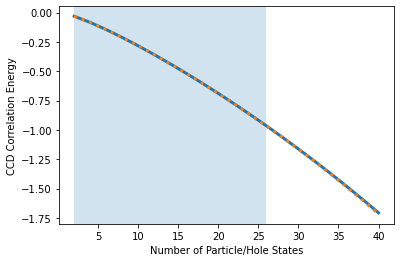

In [21]:
from DataSets import *
# Create the total data set and plot it
name, training_dim, Xtot, ytot = VaryDimension ()
plt.plot(Xtot, ytot, linewidth=3, label="True Data")

# Set the min and max values for the training data and plot the region
min = 0
max = training_dim
plt.axvspan(Xtot[min], Xtot[max], alpha=0.2)

# Create the training data
Xtrain = Xtot[min:max]
ytrain = ytot[min:max]
# Note: training data needs to be a LIST
ytrain = ytrain.tolist()

# Regression Parameters
seq = 2
alpha = 0

# Format only the y component of the training data using sequential
# data formatting
X, y = format_sequential_data (ytrain, seq=seq)

# Initialize and instance of the ridge regression classs and train
# it using the formatted data
R = RR(alpha, True)
R.fit(X, y)

# Using the trained ridge regression algorithm, extrapolate the
# training data set until the total set is the same length as the
# total data set
y_test = sequential_extrapolate(R, ytrain, len(ytot), seq=seq,\
    isAutoRegressive = False, isErrorAnalysis = True, y_true = ytot)

# Plot the predicted data and save the image
plt.plot(Xtot, y_test, ':', label="Predicted Data", linewidth=3)
plt.xlabel("Number of Particle/Hole States")
plt.ylabel("CCD Correlation Energy")
plt.savefig("CC.png",dpi=1000)


